<a href="https://colab.research.google.com/github/jdbj89/colab_repo/blob/main/Interes_NoInteres_FinalV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install datasets
!pip install datasets

# Make sure that we have a recent version of pyarrow in the session before we continue - otherwise reboot Colab to activate it
import pyarrow
if int(pyarrow.__version__.split('.')[1]) < 16 and int(pyarrow.__version__.split('.')[0]) == 0:
    import os
    os.kill(os.getpid(), 9)

     |████████████████████████████████| 194kB 5.0MB/s 
     |████████████████████████████████| 245kB 9.1MB/s 
     |████████████████████████████████| 112kB 9.8MB/s 


In [ ]:
# Let's import the library. We typically only need at most four methods:
from datasets import list_datasets, list_metrics, load_dataset, load_metric
from pprint import pprint

In [ ]:
mlsum_dataset = load_dataset("mlsum", "es", "train")
# wiki_dataset = load_dataset("wikicorpus", "raw_es")

Using custom data configuration es-data_dir=train


Dataset mlsum downloaded and prepared to /root/.cache/huggingface/datasets/mlsum/es-data_dir=train/1.0.0/fa51ffa9847464afce0f114ce70ab956e57905627bb24435851ddb91312a2238. Subsequent calls will reuse this data.


In [ ]:
pprint(mlsum_dataset)
pprint(mlsum_dataset.column_names)
print(mlsum_dataset["train"]['text'][:1])


{'test': Dataset({
    features: ['text', 'summary', 'topic', 'url', 'title', 'date'],
    num_rows: 13920
}),
 'train': Dataset({
    features: ['text', 'summary', 'topic', 'url', 'title', 'date'],
    num_rows: 266367
}),
 'validation': Dataset({
    features: ['text', 'summary', 'topic', 'url', 'title', 'date'],
    num_rows: 10358
})}
{'test': ['date', 'summary', 'text', 'title', 'topic', 'url'],
 'train': ['date', 'summary', 'text', 'title', 'topic', 'url'],
 'validation': ['date', 'summary', 'text', 'title', 'topic', 'url']}
['De momento, no podemos responder a la pregunta frivolona que toda España se hace hoy, además de por qué bebí tanto anoche. ¿Qué cadena ganó en la retransmisión de las campanadas? Los sentimos, Sofres no ofrece hoy los datos por ser festivo. Los contendientes fueron el colegueo de Los Manolos, Manu Carreño y Manolo Lama (Cuatro), la gracia y juventud de los actores Antonio Garrido y Patricia Montero (Antena 3), el morboso dúo Sálvame, Javier Vázquez y Belén 

In [ ]:
import pandas as pd

df_data=pd.DataFrame(mlsum_dataset["train"]['text'][:7484], columns=['Text'])
df_data['Type']="discarded"
df_data.head()

,Text,Type
0,"De momento, no podemos responder a la pregunta...",discarded
1,Los vuelos han venido registrando este viernes...,discarded
2,El Gobierno turco ha anunciado que emprenderá ...,discarded
3,La policía de Finlandia ha informado este vier...,discarded
4,"""Hemos descubierto un agujero vertical en la L...",discarded


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

dataPath="/content/drive/MyDrive/Data_Text/"

df0 = pd.read_csv(dataPath+"data_0.csv")
df1 = pd.read_csv(dataPath+"data_1.csv")
df2 = pd.read_csv(dataPath+"data_2.csv")
df3 = pd.read_csv(dataPath+"data_3.csv")
df4 = pd.read_csv(dataPath+"data_4.csv")

df0.drop(df0.index[0], inplace=True) #Se borra el primer dato por que es un dato aislado y no esta dentro del rango estipulado --JD

dfaux=df4[df4["Id Num"]<=20800]

dfTest=df4[df4["Id Num"]>20800].reset_index(drop=True)

dfTest=dfTest[dfTest['Type']!="none"].reset_index(drop=True)


frames = [df0, df1, df2, df3, dfaux]
MedData = pd.concat(frames).reset_index(drop=True) #ojo importante reiniciar los indices, tuve un grave error sin eso --JD

MedData.drop_duplicates(inplace = True) #En el proceso de recopilacion de la info se duplico un archivo por eso se borra --JD

MedData= MedData[MedData['Type']!="none"].reset_index(drop=True)
MedData=MedData[['Text', 'Type']]

MedData['Type'] = MedData['Type'].replace(['history'],['discarded'])
MedData['Type'] = MedData['Type'].replace(['procedure','medicine'],['important','important'])

RawData = pd.concat([df_data, MedData]).reset_index(drop=True) #ojo importante reiniciar los indices, tuve un grave error sin eso --JD
RawData = RawData.sample(frac=1).reset_index(drop=True)

display(RawData)
# RawData.head

,Text,Type
0,Las universidades construyen mitos con los que...,discarded
1,Fecha y Hora de Solicitud:\n06/02/2021 11:36\n...,important
2,FÓRMULA\nNúmero de fórmula:\nFecha elaboración...,important
3,Keralty\nINVERSIONES CLINITAS S.A.\nINTERCON\n...,discarded
4,Clínica Carriazo S.A.\nPaciente:\nContrato:\nM...,important
...,...,...
11221,El Ejército colombiano ha detenido este doming...,discarded
11222,DISPONIBLE\nGASTROENTEROLOGIA CLINICA - ENDOSC...,important
11223,UBAFERTIL Dr. Orlando Ruiz Jiménez\nUnidad Bás...,important
11224,Fecha de Impresión: 19/01/2021 09:34\nHORGHOSP...,important


In [ ]:
import numpy as np
import sklearn
from io import StringIO


RawData['category_id'] = RawData['Type'].factorize()[0]  # otorga un valor para cada tipo de dato --JD

category_id_df = RawData[['Type', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Type']].values)

print(category_id_df)
print(category_to_id)
print(id_to_category)

        Type  category_id
0  discarded            0
1  important            1
{'discarded': 0, 'important': 1}
{0: 'discarded', 1: 'important'}


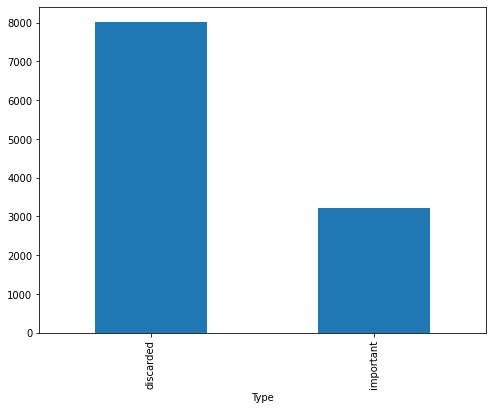

Type
discarded    8016
important    3210
Name: Text, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

RawData.groupby('Type').Text.count().plot.bar(ylim=0)
plt.show()

print(RawData.groupby('Type').Text.count())

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import pickle
from nltk.corpus import stopwords

# sublinear_df is set to True to use a logarithmic form for frequency.
# min_df is the minimum numbers of documents a word must be present in to be kept.
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.

#vectorizer = TfidfVectorizer(max_features=70000, stop_words=stopwords.words("spanish"))
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_features=70000, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stopwords.words("spanish"))
#vectorizer = TfidfVectorizer(min_df=5, norm='l2', ngram_range=(1, 2))

tfidf = vectorizer.fit(RawData["Text"].values.astype('U'))
# features = vectorizer.fit_transform(RawData["Text"].values.astype('U'))
# features = vectorizer.fit_transform(RawData.Text).toarray()
features = vectorizer.fit_transform(RawData.Text)
labels = RawData.category_id
features.shape
# print(labels)


(11226, 70000)

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, RawData.index, test_size=0.2, random_state=0)

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
model_path = dataPath + "model_Info_Dis_ImpV2.pickle"
tfidf_path = dataPath + "vectorizer_Info_Dis_ImpV2.pickle"
pickle.dump(model, open(model_path, 'wb'))
pickle.dump(tfidf, open(tfidf_path, "wb"))

In [ ]:
tfidf_loaded = pickle.load(open(tfidf_path,'rb'))
model_loaded = pickle.load(open(model_path,'rb'))
pred = model_loaded.predict(tfidf_loaded.transform(["Solicitud de procedimiento TAC abdominal paciente con cancer pulmonar"]))[0]
print ("predicted class:", id_to_category[pred])

predicted class: important


In [ ]:
pred = model_loaded.predict(tfidf_loaded.transform(["Informacion de Interes, por favor pagar en el punto mas cernano"]))[0]
print ("predicted class:", id_to_category[pred])

predicted class: important


In [ ]:
pred = model_loaded.predict(tfidf_loaded.transform(["Bancolombia, cuenta de ahorros 3323232, el estado actual es bloqueada por robo"]))[0]
print ("predicted class:", id_to_category[pred])

predicted class: discarded


In [ ]:
pred = model_loaded.predict(tfidf_loaded.transform(["La señora Gabriela salio de sus casa y se encontro con un pariente"]))[0]
print ("predicted class:", id_to_category[pred])

predicted class: discarded


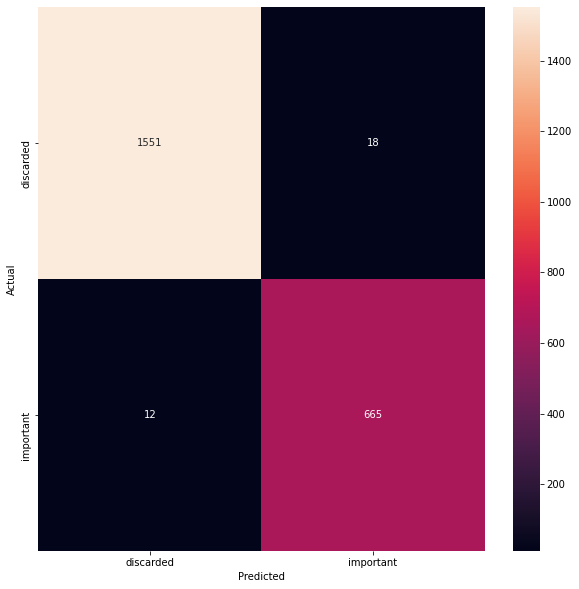

              precision    recall  f1-score   support

   discarded       0.99      0.99      0.99      1569
   important       0.97      0.98      0.98       677

    accuracy                           0.99      2246
   macro avg       0.98      0.99      0.98      2246
weighted avg       0.99      0.99      0.99      2246



In [ ]:
import seaborn as sns
from sklearn import metrics

y_pred = model_loaded.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(y_test, y_pred, target_names=RawData['Type'].unique()))

,Text,Type,category_id
0,Paciente: CE 711825 - Victoria Isabella Lara M...,discarded,0
1,"Evidentemente, no he cambiado de posición. Com...",discarded,0
2,Keralty\nINVERSIONES CLINITAS S.A.\nFecha: 18/...,important,1
3,Es un consejo de guerra al que acuden algunas ...,discarded,0
4,¿Por qué son tan complicadas las relaciones? ¿...,discarded,0
...,...,...,...
367,Keralty\nSISTEMA DE REGISTRO CLÍNICO AVICENA\n...,discarded,0
368,"En este momento, en algún lugar de la gran red...",discarded,0
369,"Rebecca y Daniel Smith, de 5 años y 11 meses, ...",discarded,0
370,YEIDY ALEXANDRA MANRIQUE CHINGATE\nREIMPRESIÓN...,important,1


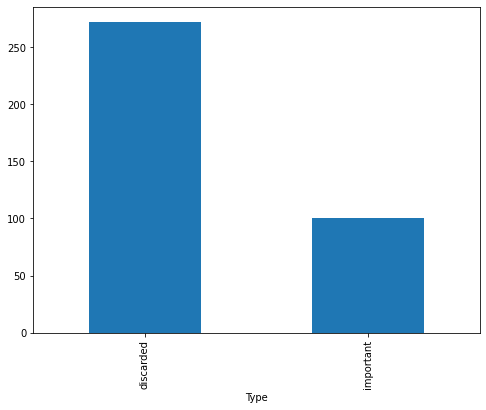

Type
discarded    272
important    100
Name: Text, dtype: int64


In [ ]:
dfTest=dfTest[['Text', 'Type']]
dfTest['Type'] = dfTest['Type'].replace(['history'],['discarded'])
dfTest['Type'] = dfTest['Type'].replace(['procedure','medicine'],['important','important'])

df_data_test=pd.DataFrame(mlsum_dataset["train"]['text'][7500:7748], columns=['Text'])
df_data_test['Type']="discarded"

test_data = pd.concat([dfTest, df_data_test]).reset_index(drop=True) #ojo importante reiniciar los indices, tuve un grave error sin eso --JD
test_data = test_data.sample(frac=1).reset_index(drop=True)

# display(test_data)

test_data['category_id'] = test_data['Type'].map(category_to_id)
display(test_data)

fig = plt.figure(figsize=(8,6))

test_data.groupby('Type').Text.count().plot.bar(ylim=0)
plt.show()

print(test_data.groupby('Type').Text.count())

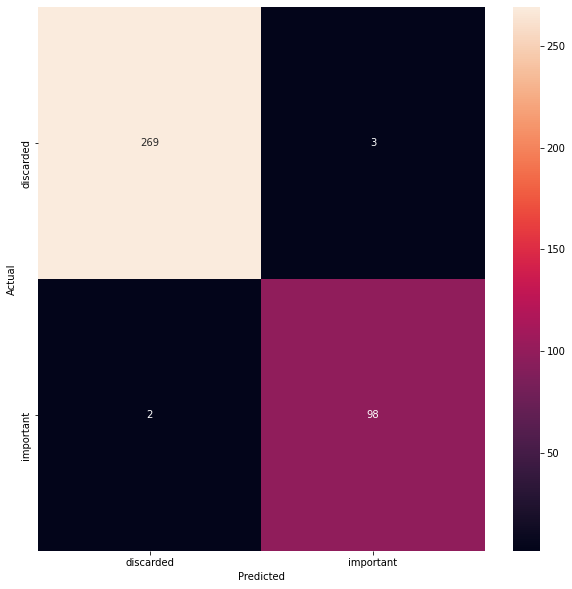

              precision    recall  f1-score   support

   discarded       0.99      0.99      0.99       272
   important       0.97      0.98      0.98       100

    accuracy                           0.99       372
   macro avg       0.98      0.98      0.98       372
weighted avg       0.99      0.99      0.99       372



In [ ]:
features_val = tfidf_loaded.transform(test_data.Text).toarray()
labels_val = test_data.category_id
features_val.shape

y_pred_val = model_loaded.predict(features_val)

conf_mat2 = confusion_matrix(labels_val, y_pred_val)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2, annot=True, fmt='d',
            xticklabels=category_id_df.Type.values, yticklabels=category_id_df.Type.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(metrics.classification_report(labels_val, y_pred_val, target_names=test_data['Type'].unique()))